In [1]:
import seaborn as sns
import matplotlib as mpl
import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import scipy.integrate as integrate
import matplotlib.colors as mcolors
import matplotlib.cm
import glob
from scipy import interpolate

In [77]:
p_avg     = 3.e3 * 1.e5
G         = 6.67e-8
Sigma_diss = 1.5 * Msun /pc/pc/Myr
chi0 = 1.0
expan_law = 0

#xi = chi0 * Sigma_diss *t0/Sigma_gas



# Flux weighted

In [78]:
Gamma = np.logspace(-3, np.log10(2.), 100)
xi_arr = np.logspace(-5, 3., 100) #xi = np.log(t0*G0/Sigma0)

a = rmax/r0

dMassFluxHI = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
       
        dMassFluxHI[i,j] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \
                                            args=(a, gamma, xi, Mach, expan_law))[0]

        dMassFluxtot[i,j] = integrate.quad(dMassFlux_tot, xlow, xhigh,  \
                                            args=(a, gamma,  Mach, expan_law))[0] 

        
    
        j+=1
            
    i+=1


In [79]:
dMassFlux = dMassFluxHI/dMassFluxtot
FH2_flux = 1. - dMassFlux
FH2_flux[FH2_flux<0.0] = 0.0
np.amax(FH2_flux),np.amin(FH2_flux)

(0.9999704831858524, 0.0)

# Mass weighted Fraction

In [84]:
Gamma = np.logspace(-3, np.log10(2.), 100)
xi_arr = np.logspace(-5, 3., 100) #xi = np.log(t0*G0/Sigma0)

a = rmax/r0

dMassHI = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMasstot = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
       
        dMassHI[i,j] = integrate.quad(dMass_HI,xlow, xhigh,   \
                                            args=(a, gamma, xi, Mach, expan_law))[0]

        dMasstot[i,j] = integrate.quad(dMass_tot, xlow, xhigh,  \
                                            args=(a, gamma,  Mach, expan_law))[0] 

        
    
        j+=1
            
    i+=1

In [85]:
dMass = dMassHI/dMasstot
FH2_mass = 1. - dMass
FH2_mass[FH2_mass<0.0] = 0.0
np.amax(FH2_mass),np.amin(FH2_mass)

(0.9999672241027121, 0.0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


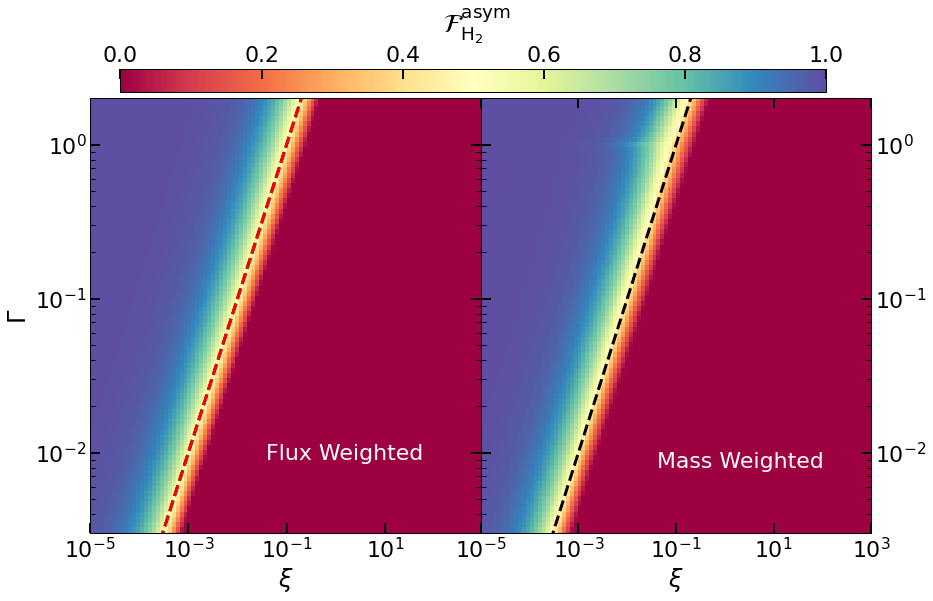

In [104]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.0, 'hspace':0.00},figsize=(14,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
lightness = 0.5
sns.desaturate("yellow",0.5)
colors =  sns.color_palette("Spectral", 8, as_cmap=True)



plot = ax[0].pcolormesh(xi_arr, Gamma, np.transpose(FH2_flux),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
ax[0].set_xlim(1.e-5, 9.e2)
ax[0].set_ylim(3.e-3, 2.)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel(r'$\Gamma$', fontsize=24)
ax[0].set_xlabel(r'$\xi$', fontsize=24)
ax[0].tick_params(axis='y', which='both', labelleft=True, right=True, left=True)
ax[0].tick_params(axis='x', which='both', labelbottom=True, bottom=True)

slope = 1.
yy =  (np.log10(xi_arr) * slope + 1.) 
ax[0].plot(xi_arr, 10.**yy, color='black', ls='--', lw=3.)


slope = 1.
yy =  (np.log10(xi_arr) * slope + 1.) 
ax[0].plot(xi_arr, 10.**yy, color='red', ls='--', lw=3.)


# slope = 1.
# yy =  (np.log10(xi_arr) * slope - 1.5) 
# ax[0].plot(xi_arr, 10.**yy, color='red', ls='--', lw=3.)




plot = ax[1].pcolormesh(xi_arr, Gamma, np.transpose(FH2_mass),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax.set_title(r" $\mathcal{F}_{\rm H_2}^{\rm asym}$")
ax[1].set_xlim(1.e-5, 1.e3)
ax[1].set_ylim(3.e-3, 2.)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
# ax[1].set_ylabel(r'$\Gamma$', fontsize=24)
ax[1].set_xlabel(r'$\xi$', fontsize=24)
ax[1].tick_params(axis='y', which='both', labelleft=False, right=True, left=True, labelright=True)
ax[1].tick_params(axis='x', which='both', labelbottom=True, bottom=True, top=True)

slope = 1.
yy =  (np.log10(xi_arr) * slope + 1.) 
ax[1].plot(xi_arr, 10.**yy, color='black', ls='--', lw=3.)

# slope = 1.
# yy =  (np.log10(xi_arr) * slope - 1.5) 
# ax[1].plot(xi_arr, 10.**yy, color='red', ls='--', lw=3.)



ax[0].legend(loc='upper left', fontsize="22", frameon=False)
# ax[1].legend(loc='upper left', fontsize="24", frameon=False)

ax[0].text(0.45, 0.17,'Flux Weighted', transform=ax[0].transAxes, color='white', fontsize=22)
ax[1].text(0.45, 0.15,'Mass Weighted', transform=ax[1].transAxes, color='white', fontsize=22)



# ax[1].legend(loc='upper left', fontsize="26")
file_name = os.path.join(fig_path, 'mass_vs_flux_weighted.jpeg')
plt.savefig(file_name, bbox_inches='tight', dpi=160 )


In [88]:
file_intfhi = 'FHI_Int.h5'
import h5py
flux_int = h5py.File(file_intfhi, 'r')

FHIflux_Int = flux_int['FHI_Int']
gamma = flux_int['Gamma_yaxis']
xi = flux_int['xi_arr_xaxis']


In [92]:
file_intfhi = '/Users/aditivijayan/Projects/PhotoDissociation/scripts/FHImass_Int.h5'
import h5py
flux_int = h5py.File(file_intfhi, 'r')

FHImass_Int = flux_int['FHI_mass_Int']
gamma1 = flux_int['Gamma_yaxis']
xi1= flux_int['xi_arr_xaxis']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


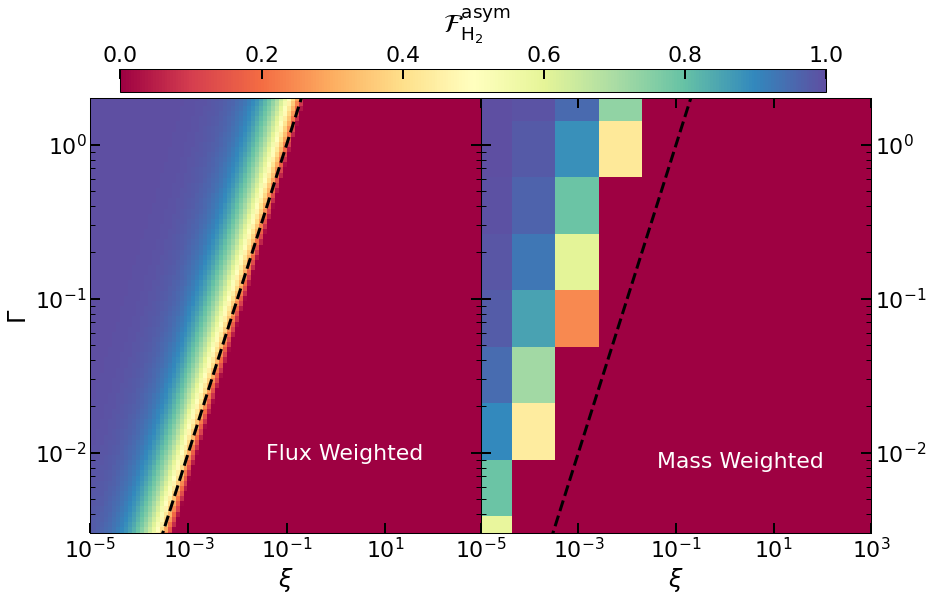

In [101]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.0, 'hspace':0.00},figsize=(14,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
lightness = 0.5
sns.desaturate("yellow",0.5)
colors =  sns.color_palette("Spectral", 8, as_cmap=True)



plot = ax[0].pcolormesh(xi, gamma, (FHIflux_Int),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
ax[0].set_xlim(1.e-5, 9.e2)
ax[0].set_ylim(3.e-3, 2.)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel(r'$\Gamma$', fontsize=24)
ax[0].set_xlabel(r'$\xi$', fontsize=24)
ax[0].tick_params(axis='y', which='both', labelleft=True, right=True, left=True)
ax[0].tick_params(axis='x', which='both', labelbottom=True, bottom=True)

slope = 1.
yy =  (np.log10(xi_arr) * slope + 1.) 
ax[0].plot(xi_arr, 10.**yy, color='black', ls='--', lw=3.)

# slope = 1.
# yy =  (np.log10(xi_arr) * slope - 1.5) 
# ax[0].plot(xi_arr, 10.**yy, color='red', ls='--', lw=3.)




plot = ax[1].pcolormesh(xi1, gamma1, (FHImass_Int),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax.set_title(r" $\mathcal{F}_{\rm H_2}^{\rm asym}$")
ax[1].set_xlim(1.e-5, 1.e3)
ax[1].set_ylim(3.e-3, 2.)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
# ax[1].set_ylabel(r'$\Gamma$', fontsize=24)
ax[1].set_xlabel(r'$\xi$', fontsize=24)
ax[1].tick_params(axis='y', which='both', labelleft=False, right=True, left=True, labelright=True)
ax[1].tick_params(axis='x', which='both', labelbottom=True, bottom=True, top=True)

slope = 1.
yy =  (np.log10(xi_arr) * slope + 1.) 
ax[1].plot(xi_arr, 10.**yy, color='black', ls='--', lw=3.)

# slope = 1.
# yy =  (np.log10(xi_arr) * slope - 1.5) 
# ax[1].plot(xi_arr, 10.**yy, color='red', ls='--', lw=3.)



ax[0].legend(loc='upper left', fontsize="22", frameon=False)
# ax[1].legend(loc='upper left', fontsize="24", frameon=False)

ax[0].text(0.45, 0.17,'Flux Weighted', transform=ax[0].transAxes, color='white', fontsize=22)
ax[1].text(0.45, 0.15,'Mass Weighted', transform=ax[1].transAxes, color='white', fontsize=22)



# ax[1].legend(loc='upper left', fontsize="26")
file_name = os.path.join(fig_path, 'mass_vs_flux_weighted.jpeg')
plt.savefig(file_name, bbox_inches='tight', dpi=160 )


In [108]:
1.e-22/mp

59.880239520958085